<h2 style="color:crimson">Ejercicio</h2>

1. Crea un pipeline llamado `model` que primero transforme el espacio con un polinomio de grado 30 (sin incluir p0) y, posteriormente, considere la transformación de los datos con una regresión logística sin regularización (`LogisticRegression(penalty="none")`)
2. Realiza un _Bagging Classifer_ de `model` llamado `bagging_logreg` con `n_estimators=100` y `random_state=314`
3. Entrena `model` y `bagging_logreg` considerando `X` y `y` definido arriba
4. Grafica la función de decisión dada por `model` y por `bagging_logreg` ¿Qué observas?
5. Considerando un `f1_score` (dentro de `sklearn.metrics`), calcula el *f1-score* sobre el test set (`X_test`, `y_test`) considerando `model` y `bagging_logreg`. ¿Qué resultados arroja?

In [27]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn, seed
%config InlineBackend.figure_format = "retina"
import sys
sys.path.append("../files")
import utils

#importo la informacion de moons
X, y = make_moons(200, noise=.2, random_state=2718)
model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=30, include_bias=False)),
    ("log_reg", LogisticRegression(solver="lbfgs", penalty = "none"))
])

#ajusto el modelo de logistic regression con sus tranformaciones a la informacion
model.fit(X, y)

C:\Users\jhony\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=30, include_bias=False,
                                    interaction_only=False, order='C')),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='none', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [28]:
from sklearn.ensemble import BaggingClassifier

#genero un bagging con el modelo de regresion logisitca
bagging_logreg = BaggingClassifier(model,
                                   n_estimators = 100,
                                   max_samples=100,
                                   bootstrap=True,
                                   n_jobs=-1,
                                  random_state=314)

bagging_logreg.fit(X, y)

BaggingClassifier(base_estimator=Pipeline(memory=None,
                                          steps=[('poly_features',
                                                  PolynomialFeatures(degree=30,
                                                                     include_bias=False,
                                                                     interaction_only=False,
                                                                     order='C')),
                                                 ('log_reg',
                                                  LogisticRegression(C=1.0,
                                                                     class_weight=None,
                                                                     dual=False,
                                                                     fit_intercept=True,
                                                                     intercept_scaling=1,
                                                 

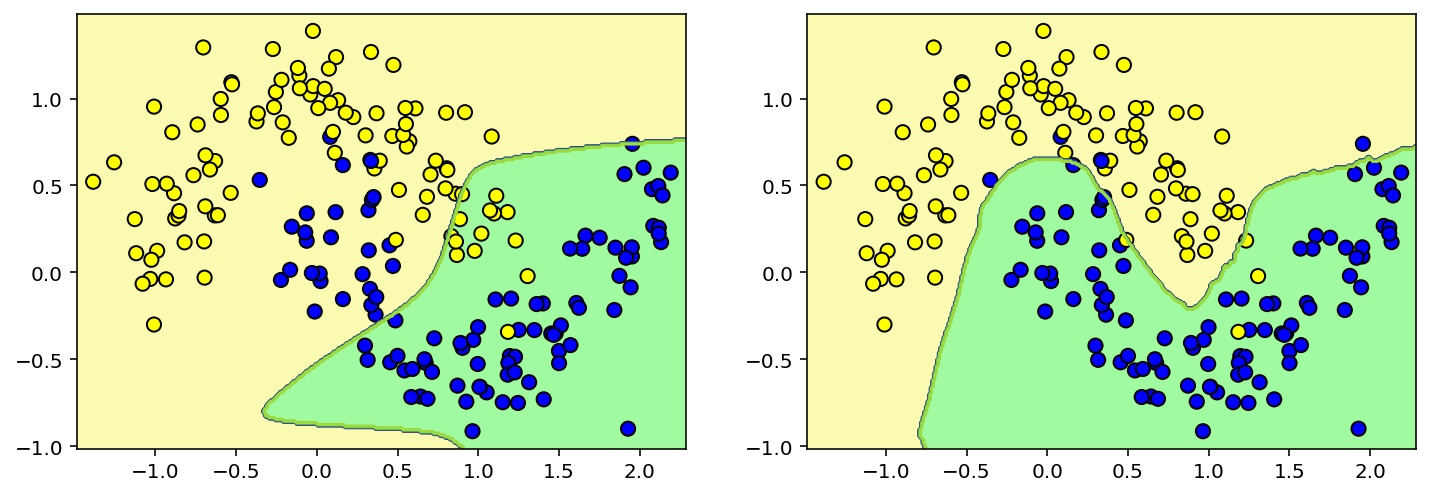

In [29]:
#grafico y comparo el modleo simple vs bagging
fig, ax = plt.subplots(1,2, figsize=(12,4))

utils.plot_classf_model(X, y, model, ax=ax[0], contour=True)
utils.plot_classf_model(X,y, bagging_logreg, ax=ax[1], contour=True)

<h2 style="color:crimson"></h2>
Se puede apreciar que con el método de bagging hay un mayor overfitting que con model. 

In [30]:
X_test, y_test = make_moons(40, noise=.2,random_state=31415)
y_predict_model = model.predict(X_test)
y_predict_proba_model = model.predict_proba(X_test)
y_predict_proba_bagging_logreg = bagging_logreg.predict_proba(X_test)
y_predict_bagging_logreg = bagging_logreg.predict(X_test)

In [31]:
y_predict_model

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [32]:
y_predict_proba_model

array([[0.50000115, 0.49999885],
       [0.        , 1.        ],
       [0.53882615, 0.46117385],
       [0.49999468, 0.50000532],
       [0.50000485, 0.49999515],
       [0.50000681, 0.49999319],
       [0.4999988 , 0.5000012 ],
       [0.51094522, 0.48905478],
       [0.49999405, 0.50000595],
       [0.50050811, 0.49949189],
       [0.50000016, 0.49999984],
       [0.50001206, 0.49998794],
       [0.50003068, 0.49996932],
       [0.50000095, 0.49999905],
       [0.49983388, 0.50016612],
       [0.50187291, 0.49812709],
       [0.50000039, 0.49999961],
       [0.        , 1.        ],
       [0.49999753, 0.50000247],
       [0.49998481, 0.50001519],
       [0.50004951, 0.49995049],
       [0.4737968 , 0.5262032 ],
       [0.5211198 , 0.4788802 ],
       [0.        , 1.        ],
       [0.50000125, 0.49999875],
       [0.50000627, 0.49999373],
       [0.        , 1.        ],
       [0.50002115, 0.49997885],
       [0.50019217, 0.49980783],
       [0.        , 1.        ],
       [0.

In [33]:
y_predict_bagging_logreg

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

In [34]:
y_predict_proba_bagging_logreg

array([[4.35540889e-01, 5.64459111e-01],
       [0.00000000e+00, 1.00000000e+00],
       [7.53428479e-01, 2.46571521e-01],
       [5.41659146e-01, 4.58340854e-01],
       [5.79950173e-01, 4.20049827e-01],
       [5.92046922e-01, 4.07953078e-01],
       [4.17446499e-01, 5.82553501e-01],
       [7.04896819e-01, 2.95103181e-01],
       [4.24705027e-01, 5.75294973e-01],
       [6.20952540e-01, 3.79047460e-01],
       [4.24944266e-01, 5.75055734e-01],
       [5.56575490e-01, 4.43424510e-01],
       [6.05048033e-01, 3.94951967e-01],
       [4.32419588e-01, 5.67580412e-01],
       [4.02247522e-01, 5.97752478e-01],
       [6.46029413e-01, 3.53970587e-01],
       [5.76352367e-01, 4.23647633e-01],
       [7.70272734e-15, 1.00000000e+00],
       [4.11300659e-01, 5.88699341e-01],
       [5.77533710e-01, 4.22466290e-01],
       [6.00160504e-01, 3.99839496e-01],
       [4.38924006e-01, 5.61075994e-01],
       [7.37209868e-01, 2.62790132e-01],
       [0.00000000e+00, 1.00000000e+00],
       [4.397826

In [35]:
#calculo el f1 score para el modelo simple y para bagging
from sklearn.metrics import f1_score

f1_model = f1_score(y_test, y_predict_model, average='binary')
f1_bagging_logreg = f1_score(y_test, y_predict_bagging_logreg, average='binary')
print(f1_model)
print(f1_bagging_logreg)

0.7567567567567567
0.9500000000000001
